In [ ]:
# ----------------------------------------------------------------------
# MÓDULOS ESSENCIAIS
import pandas as pd
import numpy as np
from google.colab import files
import io
from sklearn.model_selection import train_test_split

# ----------------------------------------------------------------------
# 1. CARREGAR E LIMPAR O DATASET (Consolidado)

print("ATENÇÃO: Selecione novamente o arquivo CSV para carregar o dataset do zero.")
uploaded = files.upload()
nome_arquivo = list(uploaded.keys())[0]

# Carrega o DataFrame
df = pd.read_csv(io.StringIO(uploaded[nome_arquivo].decode('utf-8')))
print(f"\nDataset '{nome_arquivo}' carregado com sucesso. Shape inicial: {df.shape}")

# Limpeza Essencial
df.replace('?', np.nan, inplace=True)
df.drop(columns=['encounter_id', 'patient_nbr'], inplace=True, errors='ignore')

# Preparação do TARGET: 1 = Readmitido ('yes'), 0 = Não Readmitido ('no')
df['TARGET_READMISSAO'] = df['readmitted'].str.lower().apply(lambda x: 1 if x == 'yes' else 0)
df.drop('readmitted', axis=1, inplace=True)

# Imputação da Mediana para Nulos (numéricos)
colunas_numericas = ['time_in_hospital', 'n_lab_procedures', 'n_procedures',
                     'n_medications', 'n_outpatient', 'n_inpatient', 'n_emergency']
for col in colunas_numericas:
    df[col] = pd.to_numeric(df[col], errors='coerce')
    df[col] = df[col].fillna(df[col].median())

# ----------------------------------------------------------------------
# 2. PRÉ-PROCESSAMENTO AVANÇADO (CODIFICAÇÃO - SEU PASSO 6.1)

# Identificar colunas categóricas (object)
colunas_categoricas = df.select_dtypes(include=['object']).columns

# Aplicar One-Hot Encoding
df_final = pd.get_dummies(df, columns=colunas_categoricas, drop_first=True, dtype=int)
print("\nCodificação One-Hot Encoding concluída.")
print(f"Número final de colunas após codificação: {df_final.shape[1]}")

# ----------------------------------------------------
# 3. SEPARAÇÃO E DIVISÃO (TREINO E TESTE)

# X são as features (variáveis preditoras) e y é o target
X = df_final.drop('TARGET_READMISSAO', axis=1)
y = df_final['TARGET_READMISSAO']

# Dividir os dados em 80% para treino e 20% para teste
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

print(f"\nConjunto de Treino (X_train): {X_train.shape}")
print(f"Conjunto de Teste (X_test): {X_test.shape}")

print("\nPREPARAÇÃO DE DADOS COMPLETA. Variáveis X_train, X_test, y_train, y_test estão prontas!")

ATENÇÃO: Selecione novamente o arquivo CSV para carregar o dataset do zero.


Saving hospital_readmissions.csv to hospital_readmissions.csv

Dataset 'hospital_readmissions.csv' carregado com sucesso. Shape inicial: (25000, 17)

Codificação One-Hot Encoding concluída.
Número final de colunas após codificação: 46

Conjunto de Treino (X_train): (20000, 45)
Conjunto de Teste (X_test): (5000, 45)

PREPARAÇÃO DE DADOS COMPLETA. Variáveis X_train, X_test, y_train, y_test estão prontas!


/tmp/ipython-input-282160766.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


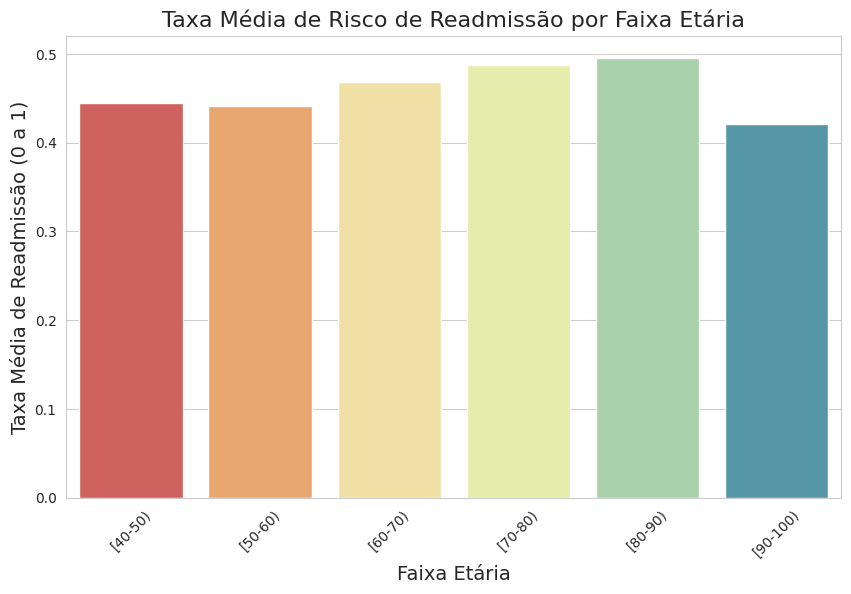

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Configuração visual
sns.set_style("whitegrid")

# Gráfico de barras que mostra a taxa média de readmissão por faixa etária
plt.figure(figsize=(10, 6))
sns.barplot(
    x='age',
    y='TARGET_READMISSAO',
    data=df.sort_values(by='age'), # Ordena por idade para visualização clara
    palette='Spectral',
    errorbar=None
)
plt.title('Taxa Média de Risco de Readmissão por Faixa Etária', fontsize=16)
plt.xlabel('Faixa Etária', fontsize=14)
plt.ylabel('Taxa Média de Readmissão (0 a 1)', fontsize=14)
plt.xticks(rotation=45)
plt.show()

/tmp/ipython-input-598230008.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


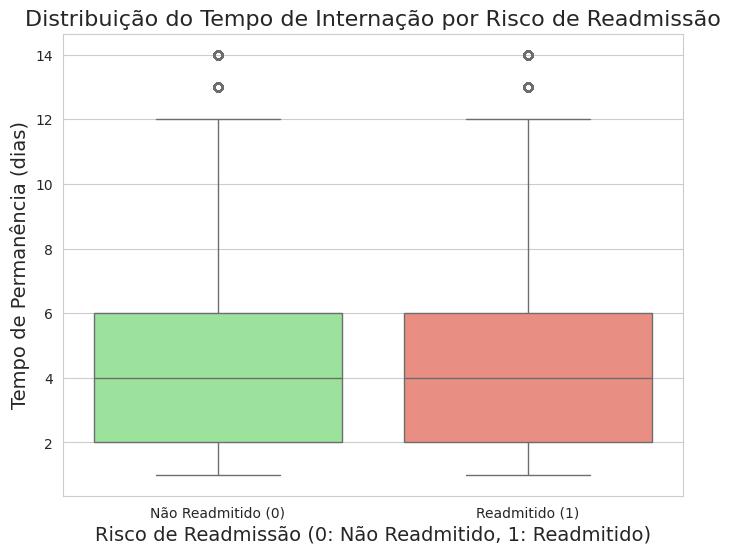

In [ ]:
# Boxplot para comparar a distribuição do tempo de internação para pacientes de Baixo e Alto Risco
plt.figure(figsize=(8, 6))
sns.boxplot(
    x='TARGET_READMISSAO',
    y='time_in_hospital',
    data=df,
    palette=['lightgreen', 'salmon']
)
plt.title('Distribuição do Tempo de Internação por Risco de Readmissão', fontsize=16)
plt.xlabel('Risco de Readmissão (0: Não Readmitido, 1: Readmitido)', fontsize=14)
plt.ylabel('Tempo de Permanência (dias)', fontsize=14)
plt.xticks([0, 1], ['Não Readmitido (0)', 'Readmitido (1)'])
plt.show()

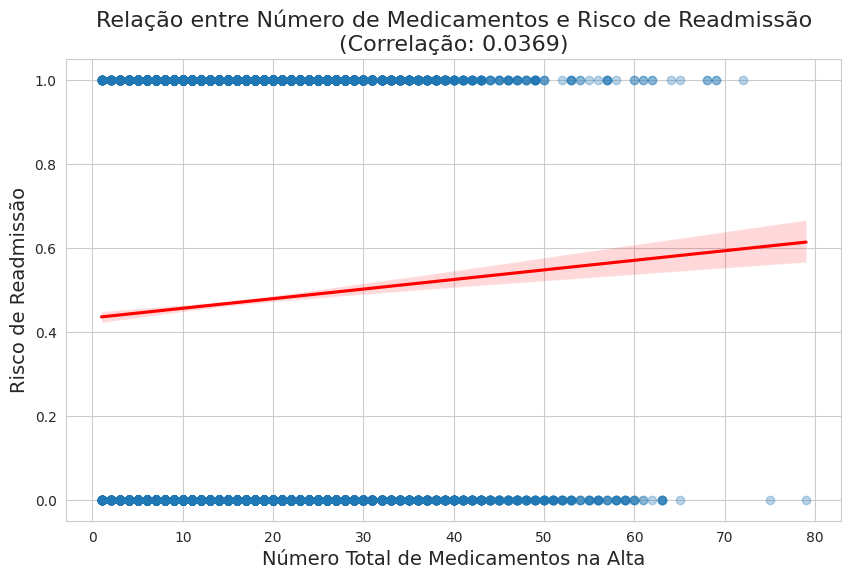

In [ ]:
# Correlação entre o número de medicamentos e o Target
correlacao = df[['n_medications', 'TARGET_READMISSAO']].corr().loc['n_medications', 'TARGET_READMISSAO']

plt.figure(figsize=(10, 6))
sns.regplot(
    x='n_medications',
    y='TARGET_READMISSAO',
    data=df,
    scatter_kws={'alpha':0.3},
    line_kws={'color':'red'}
)
plt.title(f'Relação entre Número de Medicamentos e Risco de Readmissão\n(Correlação: {correlacao:.4f})', fontsize=16)
plt.xlabel('Número Total de Medicamentos na Alta', fontsize=14)
plt.ylabel('Risco de Readmissão', fontsize=14)
# Ajuste o limite Y para visualizar melhor o scatter plot, se necessário:
# plt.ylim(0.4, 0.6)
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
import pandas as pd

# ----------------------------------------------------
# 1. CODIFICAÇÃO DE VARIÁVEIS CATEGÓRICAS (One-Hot Encoding)
# Identificar colunas categóricas (object)
colunas_categoricas = df.select_dtypes(include=['object']).columns # AGORA df EXISTE
# 2. SEPARAÇÃO DE FEATURES (X) E TARGET (y)

X = df_final.drop('TARGET_READMISSAO', axis=1) # Todas as colunas, exceto o target
y = df_final['TARGET_READMISSAO'] # A coluna que queremos prever

# ----------------------------------------------------
# 3. DIVISÃO EM TREINO E TESTE
# 80% para treinar o modelo e 20% para testar seu desempenho.

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y # Importante: mantém a proporção de 47% de readmitidos em ambos os conjuntos
)

print(f"\nConjunto de Treino (X_train): {X_train.shape}")
print(f"Conjunto de Teste (X_test): {X_test.shape}")


Conjunto de Treino (X_train): (20000, 45)
Conjunto de Teste (X_test): (5000, 45)



Modelo de Regressão Logística Treinado com Sucesso!

ACURÁCIA GERAL DO MODELO: 0.6082

--- RELATÓRIO DE CLASSIFICAÇÃO ---
                    precision    recall  f1-score   support

Não Readmitido (0)       0.60      0.78      0.68      2649
    Readmitido (1)       0.63      0.41      0.50      2351

          accuracy                           0.61      5000
         macro avg       0.61      0.60      0.59      5000
      weighted avg       0.61      0.61      0.59      5000



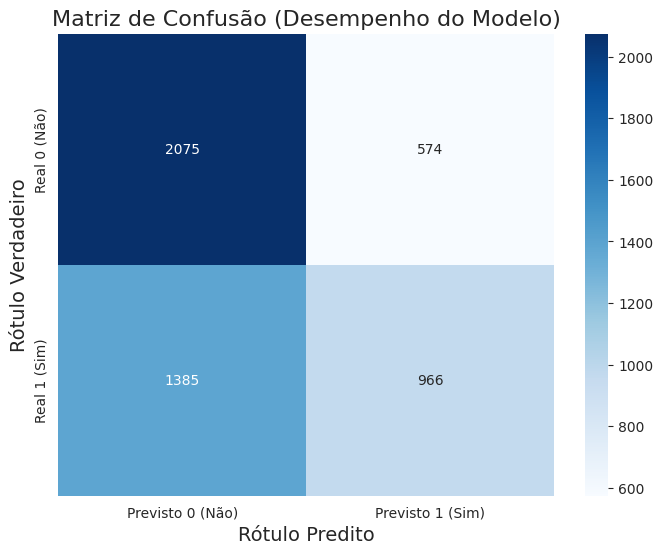


INSIGHT CRÍTICO (Recall): O modelo identifica 41.09% dos pacientes que REALMENTE serão readmitidos.
Este é o valor mais importante para a estratégia de prevenção de custos da HealthCare Solutions.


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# ----------------------------------------------------
# 1. TREINAMENTO DO MODELO (Regressão Logística)

# Inicializar e treinar o modelo. Estamos usando as variáveis criadas na célula anterior.
# O parâmetro random_state=42 garante que os resultados sejam sempre os mesmos (reprodutibilidade).
modelo_rl = LogisticRegression(max_iter=1000, solver='liblinear', random_state=42)
modelo_rl.fit(X_train, y_train)

# Fazer previsões no conjunto de teste
y_pred = modelo_rl.predict(X_test)

print("\nModelo de Regressão Logística Treinado com Sucesso!")

# ----------------------------------------------------
# 2. AVALIAÇÃO DE RESULTADOS (Métricas para o Relatório)

acuracia = accuracy_score(y_test, y_pred)
print(f"\nACURÁCIA GERAL DO MODELO: {acuracia:.4f}")

# Relatório Completo (Precision, Recall, F1-Score)
print("\n--- RELATÓRIO DE CLASSIFICAÇÃO ---")
target_names = ['Não Readmitido (0)', 'Readmitido (1)']
relatorio_classificacao = classification_report(y_test, y_pred, target_names=target_names, output_dict=True)
print(classification_report(y_test, y_pred, target_names=target_names))

# ----------------------------------------------------
# 3. MATRIZ DE CONFUSÃO (Visualização Chave para o PDF/Pitch)

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Previsto 0 (Não)', 'Previsto 1 (Sim)'],
            yticklabels=['Real 0 (Não)', 'Real 1 (Sim)'])
plt.title('Matriz de Confusão (Desempenho do Modelo)', fontsize=16)
plt.ylabel('Rótulo Verdadeiro', fontsize=14)
plt.xlabel('Rótulo Predito', fontsize=14)
plt.show()

# ----------------------------------------------------
# 4. INTERPRETAÇÃO DO INSIGHT CRÍTICO

# O Recall da classe 1 é o mais importante para a HealthCare Solutions.
# Ele mede a capacidade do modelo de identificar os casos de ALTO CUSTO (readmissão).
recall_readmitido = relatorio_classificacao['Readmitido (1)']['recall']

print(f"\nINSIGHT CRÍTICO (Recall): O modelo identifica {recall_readmitido:.2%} dos pacientes que REALMENTE serão readmitidos.")
print("Este é o valor mais importante para a estratégia de prevenção de custos da HealthCare Solutions.")